## Image Recognition in python using pillow

In [3]:
#importing all necesaary stuff 
#-we need pillow, numpy and matplotlib

#### Pillow is Python Imaging Library
#### Image module in PIL contains class with the same name which is used to represent images and also provides many functions to open images and load them.
#### reduce() function applies the function passed in it to all the list of sequences which are in the argument.
#### Counter is similar to multiset which keeps a track of hashable objects

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import reduce
from collections import Counter

In [7]:
#read image
i = Image.open('images/numbers/0.1.png')

In [8]:
#define an array that corresponds to our image
#it is a 3D array
iar = np.asarray(i)

The columns correspond to red, yellow, blue and alpha respectively

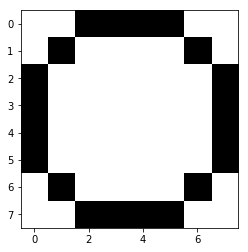

In [9]:
plt.imshow(iar)
plt.show()

#### We need to define a function to convert every image in black and white rather than the RGB colors.  0
#### -Binary might be too simple and it could not represent the picture character. Color might be too much and affect the processing speed, hence convert to black and white rather than RGB.

In [11]:
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    
    
    for eachRow in imageArray:
        for eachPixel in eachRow:
            avgNum = reduce(lambda x, y: x+y , eachPixel[:3])/len(eachPixel[:3])
            balanceAr.append(avgNum)
    balance = reduce(lambda x, y: x+y , balanceAr)/len(balanceAr)
    
    for eachRow in newAr:
        for eachPixel in eachRow:
            if reduce(lambda x, y: x + y, eachPixel[:3])/len(eachPixel[:3])  >  balance :
                eachPixel[0] =255
                eachPixel[1] =255
                eachPixel[2] =255
                eachPixel[3] =255
            else:
                eachPixel[0] =0
                eachPixel[1] =0
                eachPixel[2] =0
                eachPixel[3] =255
    return newAr

/home/gauri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
/home/gauri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


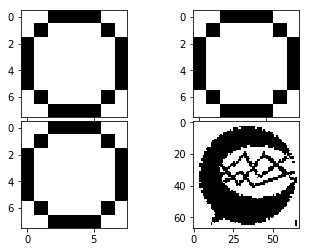

In [12]:
i = Image.open('images/numbers/0.1.png')
iar = np.asarray(i)
iar=iar.copy()

i2 = Image.open('images/numbers/y0.4.png')
iar2 = np.asarray(i2)
iar2=iar2.copy()

i3 = Image.open('images/numbers/y0.5.png')
iar3 = np.asarray(i3)
iar3=iar3.copy()

i4 = Image.open('images/sentdex.png')
iar4 = np.asarray(i4)
iar4=iar4.copy()


threshold(iar3)
threshold(iar2)
threshold(iar4)

fig = plt.figure()

#subplot2grid creates an axis at specific location in the grid
ax1 = plt.subplot2grid((8,6), (0,0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8,6), (4,0), rowspan=4, colspan=3)
ax3 = plt.subplot2grid((8,6), (0,3), rowspan=4, colspan=3)
ax4 = plt.subplot2grid((8,6), (4,3), rowspan=4, colspan=3)

ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)

plt.show()




#### We create a function for automatically reading all the files from the path 

In [13]:
def createExamples():
    numberArrayexamples = open('numexample.txt', 'a')
    numbersWeHave = range(0, 10)
    versionsWeHave = range(1, 10)
    
    for eachNum in numbersWeHave:
        for eachVer in versionsWeHave:
            imageFilePath = 'images/numbers/' + str(eachNum) +  '.' + str(eachVer) + '.png'
            #rach image
            ei = Image.open(imageFilePath)
            #each image array
            eiar = np.array(ei)
            #converting array to list
            eiar1 = str(eiar.tolist())
            
            lineToWrite = str(eachNum) +  ' : : ' + eiar1 +  '\n'
            numberArrayexamples.write(lineToWrite)
            
            
createExamples()
            
        

In [14]:
def whatNumIsThis(filePath):

    matchedAr = []
    loadExamps = open('numexample.txt','r').read()
    loadExamps = loadExamps.split('\n')
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    inQuestion = str(iarl)
    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split(' : : ')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')
            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            continue
                
    x = Counter(matchedAr)
    print(x)
    #data visualization
    graphX = []
    graphY = []

    ylimi = 400

    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])
        ylimi = x[eachThing]



    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(400)
    
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)

    plt.show()
                

            
            
            
    

Counter({0: 3864, 3: 3128, 6: 3104, 8: 2984, 2: 2824, 9: 2800, 5: 2728, 4: 2360, 7: 2336, 1: 2120})


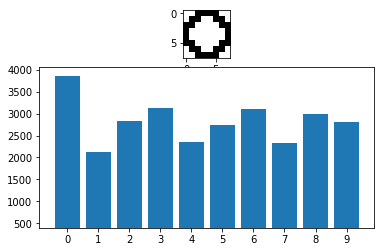

In [15]:
whatNumIsThis('images/numbers/0.6.png')